In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import pickle
sys.path.append(r"C:\Users\Alireza\Documents\Git\Cosine-Project")
from inSilico_experiments.utils.pothook_analysis_lib import *
from torchvision.transforms import ToTensor, ToPILImage, Pad
from torchvision.utils import make_grid
import seaborn as sns

# load metadata 
data_path = r"N:\PonceLab\Users\Alireza\insilico_experiments\Alexnet_remonstration_across_different_layer_062023\post_processed"

metadata_df_cosine_intralayer = pd.read_hdf(os.path.join(data_path, "metadata_df_inter_layer_with_normalized_dist.h5"), key="metadata_df")
metadata_df_cosine_crosslayer = pd.read_hdf(os.path.join(data_path, "metadata_df_intera_layer_with_normalized_dist.h5"), key="metadata_df")
# concatenate the two dataframes
metadata_df_cosine = pd.concat([metadata_df_cosine_intralayer, metadata_df_cosine_crosslayer], ignore_index=False)
#metadata_df_cosine = metadata_df_cosine_most
save_root = r"N:\PonceLab\Users\Alireza\insilico_experiments\Alexnet_remonstration_across_different_layer_062023\results"


c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


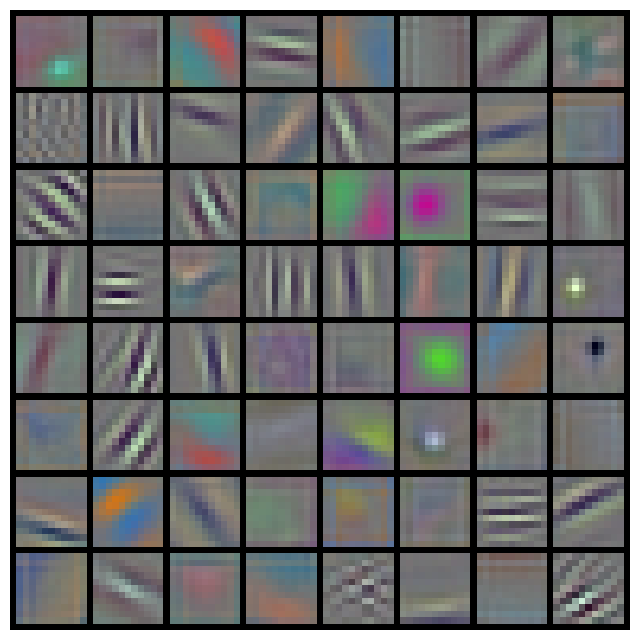

In [23]:
import sys
sys.path.append(r"C:\Users\Alireza\Documents\Git\Cosine-Project")
import os
from os.path import join
import numpy as np
import torch
from torchvision import models
from torchvision import transforms
import torch.nn.functional as F
from core.utils.layer_hook_utils import layername_dict, register_hook_by_module_names
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1):
    n,c,w,h = tensor.shape
    if allkernels: tensor = tensor.view(n*c, -1, w, h)
    elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)
    rows = np.min((tensor.shape[0] // nrow + 1, 64))
    grid = make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    plt.figure( figsize=(nrow,rows) )
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
net = models.alexnet(pretrained=True)
model = net.cpu()
#filter = model.conv1.weight.data.clone()
filter = model.features[0].weight.data.clone()
visTensor(filter, ch=0, allkernels=False)
plt.axis('off')
plt.ioff()
plt.show()



In [21]:
# get all attribute of thee net object
model


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Done imagenet_18_cosine in 93.49596047401428 seconds
Done invar_4_cosine in 94.892404794693 seconds
Done ecoset_33_cosine in 92.11501717567444 seconds
Done invar_3_cosine in 98.0547981262207 seconds
Done invar_2_cosine in 92.8508198261261 seconds
Done ecoset_11_cosine in 102.50939083099365 seconds
Done ecoset_12_cosine in 91.89689040184021 seconds
Done invar_1_cosine in 92.66607189178467 seconds
Done n08524735_17105_cosine in 99.55622267723083 seconds
Done imagenet_116_cosine in 95.83574438095093 seconds
Done imagenet_8_cosine in 96.6363251209259 seconds
Done ecoset_49_cosine in 99.78594875335693 seconds
Done n05716342_1492_cosine in 103.01738715171814 seconds
Done ecoset_10_cosine in 103.33415937423706 seconds
Done imagenet_58_cosine in 113.77234053611755 seconds
Done imagenet_14_cosine in 115.59227705001831 seconds
Done invar_3_rotated_cosine in 121.22310495376587 seconds
Done invar_1_flipped_cosine in 110.78396916389465 seconds
Done imagenet_83_cosine in 121.18444466590881 seconds
D

ValueError: the input kwargs: {'trget_imge_name': 'imagenet_18', 'pop_resampling_id': 0, 'layer_short': 'conv5', 'output_type': 'target_img_RF_masked', 'pop_size': 8, 'sub_pop_type': 'random'} does not match any row in the dataframe or match more than one row

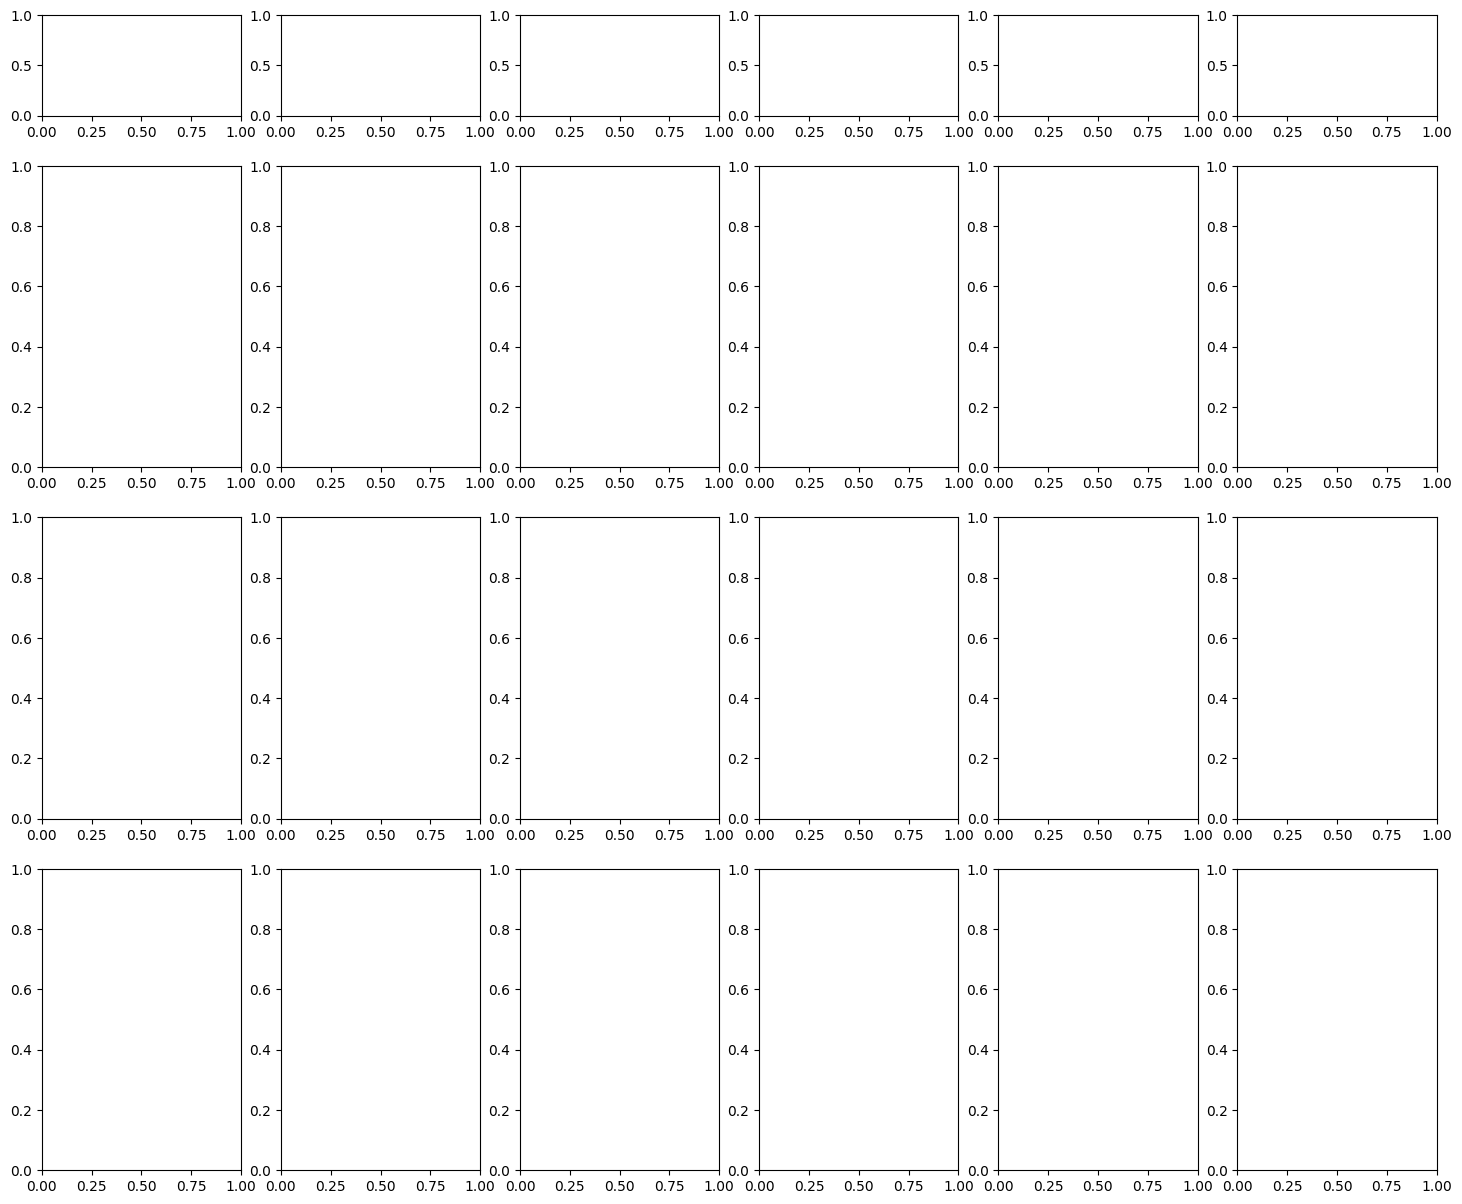

In [2]:
# preaper the layout for the incvariance plot
import matplotlib as mpl
import time
color_map_name_cosine = "jet"
pading_cmap_cosine=mpl.colormaps[color_map_name_cosine]
color_map_name_MSE = "jet"
pading_cmap_MSE=mpl.colormaps[color_map_name_MSE]

def addhock_normalization(inval, minval, maxval):
    return (inval - minval) / (maxval - minval)

cosine_min = .75
cosine_max = 1
MSE_min = -25
MSE_max = 3
image_name_list = metadata_df_cosine["trget_imge_name"].unique()
layer_short_list = ["conv5", "conv5432", "conv53"]
similarity_metric_list = ["cosine", "MSE"]
smpling_type_list = ["most", "random"]
pop_size_list = [8, 16, 32, 64, 128, 256]
each_layer_pop_size_coeff = [1, .25, .5]
RF_treshold = 2
pop_resampling_id = 0
output_type = "target_img_RF_masked"
gen_image_type = "best_gen_imgs_RF_masked"
save_path_root = os.path.join(save_root, "inter_layer_intra_layer_comparision")
initTime = time.time()
for sampling_type in smpling_type_list:
    save_path = os.path.join(save_path_root, sampling_type)
    padding = 3
    num_of_reconstruction_repetitions = metadata_df_cosine["gen_rerun_id"].max()+1
    for similarity_metric in similarity_metric_list:
        save_path = os.path.join(save_path, similarity_metric)
        for image_name in image_name_list:
            # make a sub plot grid of size (3, len(layer_short_list)) the ratio of the row is 3:1:3
            fig, ax = plt.subplots( len(layer_short_list)+1 ,len(pop_size_list), figsize=(18, 15), gridspec_kw={'height_ratios': [1, 3, 3, 3]})
            for i, real_pop_size in enumerate(pop_size_list):
                
                layer_short = "conv5"
                target_image = load_image_tsr(metadata_df_cosine, trget_imge_name=image_name, pop_resampling_id=pop_resampling_id,
                                            layer_short=layer_short, output_type=output_type, pop_size=real_pop_size, sub_pop_type=sampling_type)
                rf_filter = np.load(os.path.join(data_path, "rf_filters", f"{layer_short}_{real_pop_size}.npz"))
                target_image_croped = image_rf_crop(target_image, (int(rf_filter["sigma_y"]*RF_treshold*2),
                                                                int(rf_filter["sigma_x"]*RF_treshold*2)))
                # show the target image
                ax[0, i].imshow(ToPILImage()(target_image_croped))
                ax[0, i].set_xticks([])
                ax[0, i].set_yticks([])
                # load the recontruction image for each gen_rerun_id and append it to a tensor
                
                for j, layer_short in enumerate(layer_short_list):
                    pop_size = int(real_pop_size*each_layer_pop_size_coeff[j])
                    rcon_score_list = []
                    for gen_rerun_id in range(num_of_reconstruction_repetitions):
                        recontruction_image = load_image_tsr(metadata_df_cosine, trget_imge_name=image_name, layer_short=layer_short,
                                                            output_type=gen_image_type, pop_size=pop_size, gen_rerun_id=gen_rerun_id,
                                                            similarity_metric=similarity_metric, sub_pop_type=sampling_type, pop_resampling_id=pop_resampling_id,)
                        # crop the recontruction image
                        recontruction_image_croped = image_rf_crop(recontruction_image, (int(rf_filter["sigma_y"]*RF_treshold*2),
                                                                                        int(rf_filter["sigma_x"]*RF_treshold*2)))
                        score = column_inquary("score", metadata_df_cosine, trget_imge_name=image_name, layer_short=layer_short,
                                                        output_type=gen_image_type, pop_size=pop_size, gen_rerun_id=gen_rerun_id,
                                                        similarity_metric=similarity_metric, sub_pop_type=sampling_type)
                        rcon_score_list.append(score)
                        if similarity_metric == "cosine":
                            norm_score = addhock_normalization(score, cosine_min, cosine_max)
                            recontruction_image_croped = add_padding(recontruction_image_croped, int(padding+(padding/(i+1))), pading_cmap_cosine(norm_score)[:3])
                        elif similarity_metric == "MSE":
                            norm_score = addhock_normalization(score, MSE_min, MSE_max)
                            recontruction_image_croped = add_padding(recontruction_image_croped, int(padding+(padding/(i+1))), pading_cmap_MSE(norm_score)[:3])
                        if gen_rerun_id == 0:
                            recontruction_image_tensor = recontruction_image_croped.unsqueeze(0)
                        else:
                            recontruction_image_tensor = torch.cat((recontruction_image_tensor, recontruction_image_croped.unsqueeze(0)), dim=0)
                    rcon_score = np.mean(rcon_score_list)        
                    recontruction_image_grid = make_grid(recontruction_image_tensor, padding= 3, pad_value= 1, nrow=2)
                    # show the recontruction image           
                    ax[j+1, i].imshow(ToPILImage()(recontruction_image_grid))
                    ax[j+1, i].axis("off")
                    # set tight layout       
            plt.tight_layout()
            # save the figure 
            os.makedirs(save_path, exist_ok=True)
            plt.savefig(os.path.join(save_path, f"{image_name}_{similarity_metric}_{sampling_type}.png"), bbox_inches="tight", pad_inches=0, dpi=300)
            plt.close()
            finishTime = time.time()
            print(f"Done {image_name}_{similarity_metric} in {finishTime-initTime} seconds")
            initTime = finishTime

In [1]:
import pygraphviz as pgv

# Create a graph object
graph = pgv.AGraph(directed=True)

# Add nodes to the graph
graph.add_node("Core Organizers")
graph.add_node("Mentors")
graph.add_node("Speakers")
graph.add_node("Administration Team")
graph.add_node("Teaching Assistants")

# Add edges to connect the nodes
graph.add_edge("Core Organizers", "Mentors")
graph.add_edge("Core Organizers", "Speakers")
graph.add_edge("Core Organizers", "Administration Team")
graph.add_edge("Administration Team", "Teaching Assistants")

# Set node and edge attributes
node_attributes = {
    "shape": "box",
    "style": "filled",
    "fillcolor": "lightblue",
    "fontname": "Arial",
    "fontsize": "12",
}

edge_attributes = {
    "color": "black",
    "arrowhead": "normal",
    "fontname": "Arial",
    "fontsize": "10",
}

for node in graph.nodes():
    n = graph.get_node(node)
    for attr, value in node_attributes.items():
        n.attr[attr] = value

for edge in graph.edges():
    e = graph.get_edge(*edge)
    for attr, value in edge_attributes.items():
        e.attr[attr] = value

# Set the output file name and format
output_file = "hierarchy_chart.png"
output_format = "png"

# Render the graph to a file
graph.draw(output_file, format=output_format, prog="dot")

print("Hierarchy chart created successfully!")

ModuleNotFoundError: No module named 'pygraphviz'